In [24]:

from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [25]:

X, y = make_blobs(centers=2, random_state=0)

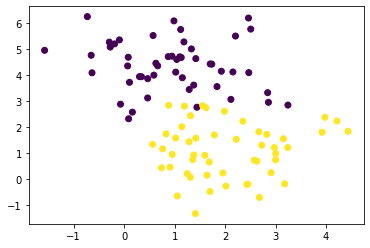

In [26]:

plt.scatter(X[:, 0], X[:, 1], c= y)

In [27]:
class CustomLogisticRegression:
    
    def __init__(self , lr= .01 , iters  = 20):
        
        self.__lr = lr
        self.__iters = iters
    def fit(self , X , y):
        
        self.__y = y.reshape(-1 ,1)
        X_mod = np.hstack([(np.ones([len(X) , 1]) ) , X])
        self.__X = X_mod
#         print(X_mod)
        self.__theta = np.zeros([X_mod.shape[1], 1])
        err = []
        for i in range(self.__iters):
            self.gradient_accend()
            err.append(self.error())
        self.theta_ = self.__theta
        return err
    def gradient_accend(self):
        
        delta_theta = self.gradient()
        self.__theta -= delta_theta
    
    def gradient(self):
        yh = self.hypothesis(self.__X)
        diff = (yh - self.__y)
        
        return np.dot(self.__X.T , diff)*self.__lr
    
    def hypothesis(self , X):
        prod = np.dot(X , self.__theta)
        sigma = 1 / (1 + np.exp(-prod))
        return sigma
    def error(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        ll = ya*np.log(yh) + (1 -ya)*np.log(1 -yh)
        return -np.mean(ll)
    def predict(self , X):
        X_mod = np.hstack([(np.ones([len(X) , 1]) ) , X])
        yh = self.hypothesis(X_mod)
        return (yh > 0.5 ).astype(int).flatten()
    def score(self , X,y):
        yp = self.predict(X)
        return np.mean(yp == y)
    def confusion_matrix(self ,X ,y):
        yp = self.predict(X)
        tp = np.mean((y==1) & (yp==1))
        tn = np.mean((y==0) & (yp==0))
        fp = np.mean((y==0) & (yp==1))
        fn = np.mean((y==1) & (yp==0))
        return np.array([[tp , fp ] , [fn , tn ]])

In [28]:
model = CustomLogisticRegression()

In [29]:
err = model.fit(X, y)

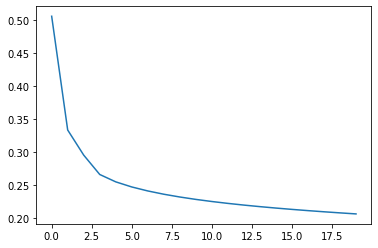

In [30]:
plt.plot(err)


In [31]:
model.theta_

array([[ 1.03887752],
       [ 1.34366726],
       [-1.29079066]])

In [32]:
model.score(X, y)

0.9

In [33]:
model.confusion_matrix(X ,y)

array([[0.43, 0.03],
       [0.07, 0.47]])